Model Explainability (Feature Importance & SHAP)

In classification tasks, we need to know which features (like Alcohol or Volatile Acidity) are driving the "Quality" prediction.

1. Global vs. Local Explainability
Global Explainability: Which features are important for the model overall? (e.g., "Generally, alcohol content is the biggest factor in wine quality.")

Local Explainability: Why did the model predict this specific bottle of wine as high quality? (e.g., "This specific bottle was rated highly because its acidity was low, despite having average alcohol.")

2. Implementation: Logistic Regression Coefficients
Since you used LogisticRegression, we can look at the coefficients. These tell us the "weight" each feature has on the final prediction.

Step 1: Extracting Global Importance (The Coefficients)
In Logistic Regression, the model assigns a weight (coefficient) to every feature.

A positive coefficient means as that feature increases, the probability of the wine being "good" increases.

A negative coefficient means as that feature increases, the probability of the wine being "good" decreases.

import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
df=pd.read_csv("WineQT.csv")

In [3]:
df.shape

(1143, 13)

In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


Split Features (X) and Target (y)

In [5]:
x=df.drop('quality',axis=1)
y=(df['quality']>5).astype(int)

Train Test Split

In [6]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

Scaling (CRITICAL for interpretation)
If features aren't scaled, a feature with big numbers (like Total Sulfur Dioxide) 
looks more important than a feature with small numbers (like Chlorides).

In [7]:
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [8]:
from sklearn.linear_model import LogisticRegression

Using optimized parameters

In [9]:
best_model=LogisticRegression(C=1,penalty='l2',solver='lbfgs',max_iter=100)
best_model.fit(x_train_scaled,y_train)

C:\Users\ranus\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'l2'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`multiclass` p

Extracting Feature Importance (The "Why")
In Logistic Regression, the Coefficients represent the importance.

Positive Coefficient: As this feature increases, the probability of "Good Quality" wine increases.

Negative Coefficient: As this feature increases, the probability of "Good Quality" wine decreases.

Get the weights (coefficients)

In [10]:
importance=best_model.coef_[0]
feature_names=x.columns

Organize into a DataFrame

In [11]:
feat_importance=pd.DataFrame({'Feature':feature_names,'Weight':importance})
feat_importance=feat_importance.sort_values(by='Weight',ascending=False)

Visualization

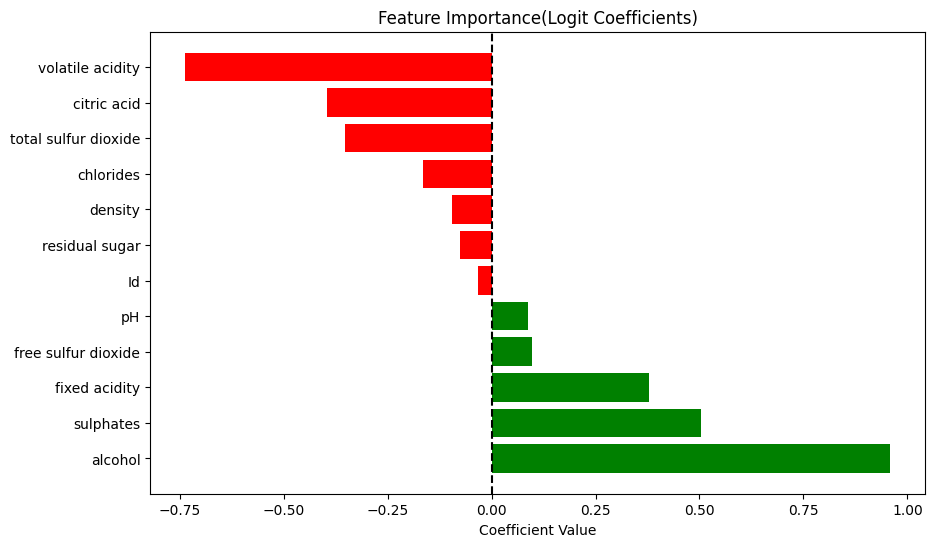

In [12]:
plt.figure(figsize=(10,6))
plt.barh(feat_importance['Feature'],feat_importance['Weight'],color=['green'if x>0 else 'red' for x in feat_importance['Weight']])
plt.axvline(x=0,color='black',linestyle='--')
plt.title("Feature Importance(Logit Coefficients)")
plt.xlabel("Coefficient Value")
plt.show()

Alcohol: Likely the strongest positive factor. High alcohol usually correlates with higher quality ratings in this dataset.

Volatile Acidity: Likely the strongest negative factor. High volatile acidity is basically vinegar—it ruins the wine!

Sulphates: Usually positive as they help preserve the wine's freshness.

Why is this a "rare skill"? Most beginners just report "80% accuracy." A Data Scientist says: "Our model is 80% accurate, and it primarily relies on Alcohol and low Volatile Acidity to make those calls, which aligns with chemistry."

It’s based on Game Theory. It treats every feature as a "player" in a game and calculates exactly how much credit each player deserves for the final score (the prediction).

Advanced Explainability with SHAP

In [25]:
pip install shap

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [13]:
import shap

In [ ]:
For Logistic Regression, we use LinearExplainer

In [14]:
explainer=shap.LinearExplainer(best_model,x_train_scaled,feature_perturbation="interventional")

C:\Users\ranus\AppData\Roaming\Python\Python312\site-packages\shap\explainers\_linear.py:99: FutureWarning: The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, maskers.Partition or maskers.Impute).
  warnings.warn(wmsg, FutureWarning)


In [ ]:
Calculate SHAP values for the test set

In [15]:
shap_values=explainer.shap_values(x_test_scaled)

In [18]:
shap_values

array([[-0.33503521, -0.23377231,  0.46480622, ..., -0.14154102,
        -0.75213478,  0.04024154],
       [-0.31266971, -1.18038554,  0.11854392, ...,  0.2229423 ,
        -0.98991697, -0.05192663],
       [-0.29030421, -0.11030102,  0.30185926, ..., -0.50602434,
         0.13954842,  0.02633071],
       ...,
       [-0.33503521, -0.91286441,  0.54627971, ..., -0.26303546,
         0.31788506,  0.04923007],
       [ 0.38066083,  0.26011285,  0.13891229, ...,  0.13182147,
        -1.01963974,  0.03289376],
       [ 0.73850885,  0.3218485 , -0.26845513, ...,  0.01032703,
        -0.27657041, -0.04086931]], shape=(229, 12))

Summary Plot: The "Holy Grail" of Model Interpretation

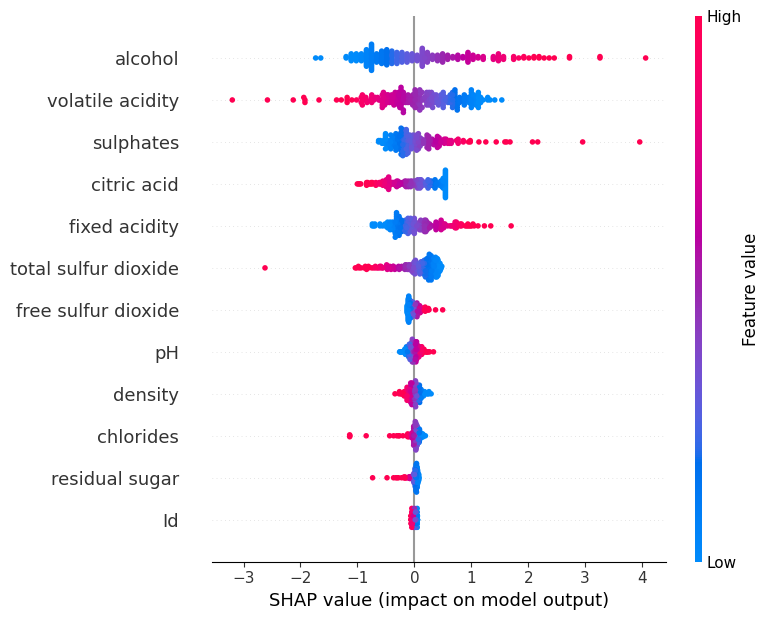

In [17]:
shap.summary_plot(shap_values,x_test_scaled,feature_names=x.columns)

This plot is packed with information. Here is how to explain it:

Feature Importance: Features are ranked from top to bottom based on total impact.

Direction of Impact: * Red dots = High values of that feature (e.g., high Alcohol).

Blue dots = Low values of that feature (e.g., low Alcohol).

The X-axis: * If a Red dot is on the right (positive SHAP), it means high values of that feature increase the quality prediction.

If a Red dot is on the left (negative SHAP), it means high values of that feature decrease the quality prediction.

Local Explainability (The "Waterfall" Plot)

let’s pick one specific bottle of wine and see why the model gave it a specific score.

Explaining the first prediction in the test set
We use .expected_value to show the "base" starting point

In [19]:
shap.initjs()
shap.force_plot(explainer.expected_value,shap_values[0,:],x_test.iloc[0,:])

To wrap up Day 11 on GitHub, add these reflections:

Coefficients vs. SHAP: Note that Coefficients give a general weight, but SHAP shows the distribution of impact across all data points.

The "Alcohol" Insight: Confirm if SHAP also shows Alcohol as the top driver.

Business Value: Write one sentence: "Being able to explain model decisions via SHAP allows us to provide actionable insights to winemakers, rather than just giving them a 'Good/Bad' label."

The Problem: The "Black Box"
Complex models (like Random Forests or Neural Networks) are great at predicting, but they are "Black Boxes"—they don't tell you why they made a choice. Standard "Feature Importance" often fails because it only tells you what matters overall, not how a specific feature affected a specific prediction.
The Solution: SHAP
SHAP is a mathematical method based on Coalitional Game Theory.
Imagine a game of football (the "Model"). The final score is the "Prediction.
1."The Players: These are your Features (Alcohol, Acidity, pH).
2.The Goal: To figure out exactly how many "points" each player contributed to the final score.SHAP looks at every possible combination of features to see how the prediction changes when a feature is present versus when it is absent.
3.How SHAP Works (The 3 Key Concepts)1. The Base Value (Expected Value)Every model starts with a "Base Value"—this is simply the average prediction of the entire dataset.
4. If the model knew nothing about a specific bottle of wine, it would just guess the average.
2. Pushes (Force)SHAP calculates how each feature "pushes" the prediction away from that average:5Positive Push (Red): Features that increase the predicted quality (e.g., "This wine has high alcohol, so I'm increasing its score").Negative Push (Blue): Features that decrease the predicted quality (e.g., "This wine is too acidic, so I'm lowering its score").
3. Additive Feature AttributionThe "magic" of SHAP is that it is additive.$$\text{Base Value} + \text{SHAP of Feature 1} + \text{SHAP of Feature 2} = \text{Final Prediction}$$

It accounts for everything perfectly with no "missing" data.Why use SHAP instead of just Coefficients?Consistency: If a model changes so that it relies more on a certain feature, the SHAP value for that feature will never decrease (standard importance can be buggy here).
6Local + Global: SHAP explains one row (Local) and can be aggregated to explain the whole dataset (Global).7Directional: Unlike "Importance" ( which just says "this feature matters"), SHAP tells you "high values of this feature make the quality go up."8Summary for your GitHub"SHAP allows us to break down a model's prediction into the exact contribution of each feature. It ensures that our model is making decisions for the right reasons (e.g., high quality is due to better chemical balance, not random noise)."